<a href="https://colab.research.google.com/github/ParkEunHyeok/MachineLearningExamples/blob/main/Multiple_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 라이브러리 선언
import numpy as np
import pandas as pd
import tensorflow as tf 
import matplotlib.pyplot as plt

In [3]:
# csv 파일 업로드
from google.colab import files
myfile = files.upload()

Saving 7-2,3_Korea_Car_Dataset.csv to 7-2,3_Korea_Car_Dataset.csv


In [10]:
# 업로드한 csv 파일 이름을 DataFrame으로 불러오기
data = pd.read_csv(r'7-2,3_Korea_Car_Dataset.csv', encoding='CP949')
df = pd.DataFrame(data[:1000])
print(df)

                         model_name maker  oil_type  ...  mileage grade    co2
0                     토요타 Prius AWD   토요타  Gasoline  ...     20.9   1등급   74.0
1          코나 1.6GDI 하이브리드 (18 타이어)    현대  Gasoline  ...     17.4   1등급   92.0
2          코나 1.6GDI 하이브리드 (16 타이어)    현대  Gasoline  ...     19.3   1등급   82.0
3             코나 1.6디젤 2WD (16 타이어)    현대    Diesel  ...     17.5   1등급  105.0
4             코나 1.6디젤 2WD (17 타이어)    현대    Diesel  ...     17.3   1등급  107.0
..                              ...   ...       ...  ...      ...   ...    ...
995          그랜드 스타렉스 2.5디젤 5밴 (15)    현대    Diesel  ...     11.0   4등급  175.0
996          그랜드 스타렉스 2.5디젤 3밴 (15)    현대    Diesel  ...     11.0   4등급  175.0
997     그랜드 스타렉스 2.5디젤 2WD 12인 (15)    현대    Diesel  ...      9.5   4등급  207.0
998  그랜드 스타렉스 2.5디젤 어린이보호차 2WD (15)    현대    Diesel  ...      9.4   4등급  208.0
999                BMW X6 xDrive30d   BMW    Diesel  ...     10.5   4등급  185.0

[1000 rows x 8 columns]


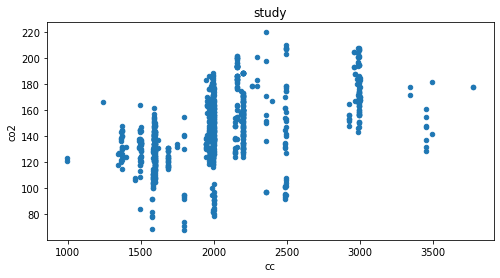

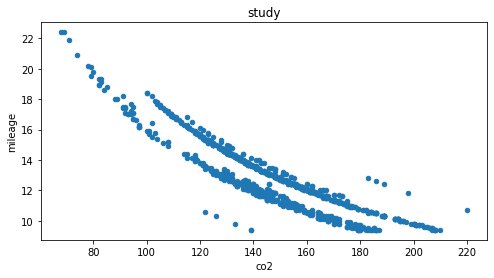

In [11]:
# cc, co2 관계 시각화 : 정비례 관계
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,1,1)
df.plot(x='cc',y='co2',
              kind='scatter', ax=ax, title="study")
plt.show()
  # co2, 연비 관계 시각화 : 반비례
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,1,1)
df.plot(x='co2',y='mileage',
              kind='scatter', ax=ax, title="study")
plt.show()

In [31]:
w1_train = df['mileage'].to_numpy()
w2_train = df['co2'].to_numpy()
b_train = df['cc'].to_numpy()

learning_rate = 0.00001
epoch = 100

w1 = np.random.uniform(-1, 1)
w2 = np.random.uniform(-1, 1)
b = np.random.uniform(-1, 1)

for i in range(epoch):
  y_pred = w1 * w1_train + w2 * w2_train + b
  error = ((y_pred - b_train)**2).mean()

  if error < 0.001:
        break

  w1_grad = learning_rate * ((y_pred - b_train)*w1_train).mean()
  w2_grad = learning_rate * ((y_pred - b_train)*w2_train).mean()
  b_grad = learning_rate * (y_pred - b_train).mean()

  w1 -= w1_grad
  w2 -= w2_grad
  b -= b_grad

  if epoch % 10 == 0:
    print("[" + str(w1) + "] [" + str(w2) + "] [" + str(b) + "] [" + str(error) + "]")

print("[" + str(w1) + "] [" + str(w2) + "] [" + str(b) + "] [" + str(error) + "]")

[-0.12518858886818185] [2.76501007884061] [-0.49755033600247917] [4587998.721294713]
[0.08182826137091473] [5.198318351384529] [-0.48119669725660213] [2833011.710579588]
[0.24405329687420974] [7.089211909380919] [-0.468437513423793] [1773108.5626646527]
[0.3714688854960194] [8.558576928169094] [-0.4584717095353396] [1132991.7417774654]
[0.4718326581458641] [9.700358084910338] [-0.45067674352385784] [746399.0926767138]
[0.5511733284814001] [10.587562920310393] [-0.4445688171918184] [512918.8765215036]
[0.6141760109222753] [11.276928028297611] [-0.4397719548286352] [371908.806542235]
[0.6644816641250825] [11.812545307591199] [-0.43599397317309496] [286744.8088297071]
[0.7049197984911005] [12.228680042693025] [-0.43300780687000734] [235308.27834497584]
[0.7376893209289571] [12.551960928580323] [-0.43063699585996384] [204240.98819917018]
[0.7644990753490043] [12.803082011909153] [-0.42874440714607365] [185475.42123632712]
[0.7866770613670753] [12.99812532626581] [-0.427223470102881] [17413